# FBI Uniform Crime Reporting Analysis | 2012

*Author: ARJ - Akshat Jain , Rahul Daruka , Jahnavi Mishra*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


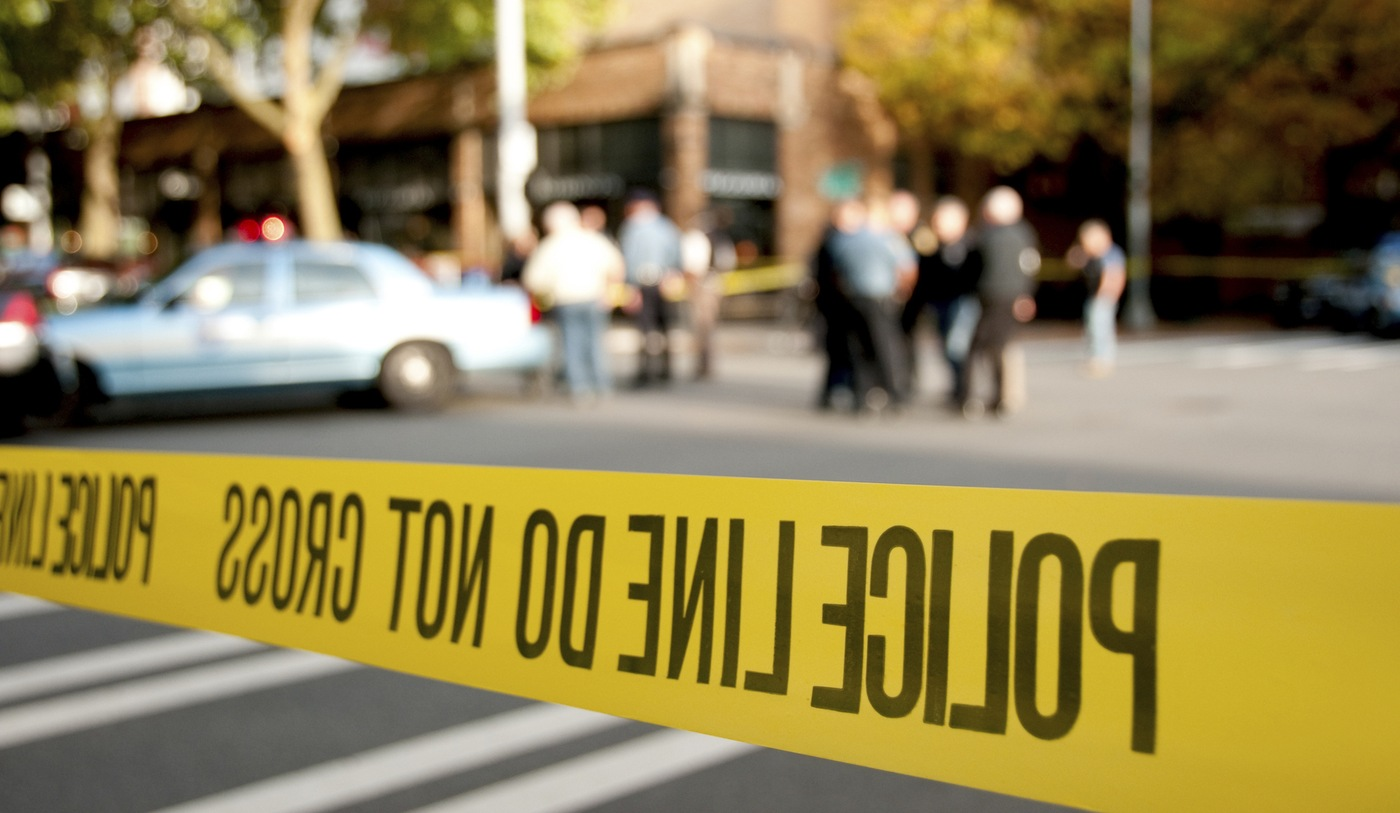

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **1- Importing dataset ditectly from kaggle**
---

># **2- Importing libraries**
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

In [ ]:
import warnings
warnings.filterwarnings("ignore")

># **3- Importing dataset**
---

In [ ]:
df=pd.read_excel("/content/U.S._Offense_Type_by_Agency_2012.xlsx", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offense Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by Agency, 2012",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,Agency Type,Agency Name,Population1,Crimes Against Persons,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations


In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offense Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by Agency, 2012",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,Agency Type,Agency Name,Population1,Crimes Against Persons,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
5,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
6,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
7,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
8,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
9,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4


> # **4- Basic Text Data Pre-processing**
---

In [ ]:
df = df.iloc[3:-4]
df.reset_index(drop = True, inplace = True)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,State,Agency Type,Agency Name,Population1,Crimes Against Persons,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
2,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
3,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
4,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
5,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
6,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
7,NaN,NaN,Arkadelphia,10698,274,35,178,61,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,NaN,NaN,Ashdown,4680,72,14,57,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,NaN,NaN,Atkins,3057,22,1,13,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.iloc[0] = df.iloc[0].fillna(method='ffill')

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,State,Agency Type,Agency Name,Population1,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,...,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society
1,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
2,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
3,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
4,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
5,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
6,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
7,NaN,NaN,Arkadelphia,10698,274,35,178,61,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,NaN,NaN,Ashdown,4680,72,14,57,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,NaN,NaN,Atkins,3057,22,1,13,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.reset_index(drop=True, inplace=True)
row1 = df.iloc[0]
row2 = df.iloc[1]

concatenated_values = [f"{val1} - {val2}" for val1, val2 in zip(row1, row2)]
new_row_df = pd.DataFrame([concatenated_values], columns=df.columns)
df = pd.concat([df, new_row_df], ignore_index=True)


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
5233,NaN,NaN,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5234,NaN,NaN,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5235,NaN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5236,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11
5237,State - nan,Agency Type - nan,Agency Name - nan,Population1 - nan,Crimes Against Persons - Assault\nOffenses,Crimes Against Persons - Aggravated\nAssault,Crimes Against Persons - Simple\nAssault,Crimes Against Persons - Intimidation,Crimes Against Persons - Homicide\nOffenses,Crimes Against Persons - Murder and Nonneglige...,...,Crimes Against Society - Gambling\nOffenses,Crimes Against Society - Betting/\nWagering,Crimes Against Society - Operating/\nPromoting...,Crimes Against Society - Gambling\nEquipment\n...,Crimes Against Society - Sports\nTampering,Crimes Against Society - Porno-\ngraphy/\nObsc...,Crimes Against Society - Prost-\nitution\nOffe...,Crimes Against Society - Prost-\nitution,Crimes Against Society - Assisting\nor Pro-\nm...,Crimes Against Society - Weapon\nLaw\nViolations


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,State,Agency Type,Agency Name,Population1,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,...,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society
1,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
2,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
3,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
4,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75


In [ ]:
values_to_paste = df.iloc[0, :4].values
df.iloc[-1, :4] = values_to_paste

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
5233,NaN,NaN,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5234,NaN,NaN,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5235,NaN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5236,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11
5237,State,Agency Type,Agency Name,Population1,Crimes Against Persons - Assault\nOffenses,Crimes Against Persons - Aggravated\nAssault,Crimes Against Persons - Simple\nAssault,Crimes Against Persons - Intimidation,Crimes Against Persons - Homicide\nOffenses,Crimes Against Persons - Murder and Nonneglige...,...,Crimes Against Society - Gambling\nOffenses,Crimes Against Society - Betting/\nWagering,Crimes Against Society - Operating/\nPromoting...,Crimes Against Society - Gambling\nEquipment\n...,Crimes Against Society - Sports\nTampering,Crimes Against Society - Porno-\ngraphy/\nObsc...,Crimes Against Society - Prost-\nitution\nOffe...,Crimes Against Society - Prost-\nitution,Crimes Against Society - Assisting\nor Pro-\nm...,Crimes Against Society - Weapon\nLaw\nViolations


In [ ]:
df = df.drop(0)
df.reset_index(drop = True, inplace = True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
1,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
2,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
3,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
4,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,NaN,NaN,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5233,NaN,NaN,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5234,NaN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5235,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11


In [ ]:
df.iloc[-1] = df.iloc[-1].str.replace('\n', ' ')
df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
1,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
2,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
3,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
4,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,NaN,NaN,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5233,NaN,NaN,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5234,NaN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5235,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11


In [ ]:
df.columns = df.iloc[-1]
df = df.drop(0)
df = df.iloc[:-1]
df.reset_index(drop = True, inplace = True)
df

5236,State,Agency Type,Agency Name,Population1,Crimes Against Persons - Assault Offenses,Crimes Against Persons - Aggravated Assault,Crimes Against Persons - Simple Assault,Crimes Against Persons - Intimidation,Crimes Against Persons - Homicide Offenses,Crimes Against Persons - Murder and Nonnegligent Manslaughter,...,Crimes Against Society - Gambling Offenses,Crimes Against Society - Betting/ Wagering,Crimes Against Society - Operating/ Promoting/ Assisting Gambling,Crimes Against Society - Gambling Equipment Violations,Crimes Against Society - Sports Tampering,Crimes Against Society - Porno- graphy/ Obscene Material,Crimes Against Society - Prost- itution Offenses,Crimes Against Society - Prost- itution,Crimes Against Society - Assisting or Pro- moting Prost- itution,Crimes Against Society - Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
2,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
3,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,NaN,NaN,Sauk,NaN,80,14,63,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5231,NaN,NaN,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5232,NaN,NaN,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5233,NaN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [ ]:
df['State'].fillna(method='ffill', inplace=True)
df['Agency Type'].fillna(method='ffill', inplace=True)


In [ ]:
df.head(20)

5236,State,Agency Type,Agency Name,Population1,Crimes Against Persons - Assault Offenses,Crimes Against Persons - Aggravated Assault,Crimes Against Persons - Simple Assault,Crimes Against Persons - Intimidation,Crimes Against Persons - Homicide Offenses,Crimes Against Persons - Murder and Nonnegligent Manslaughter,...,Crimes Against Society - Gambling Offenses,Crimes Against Society - Betting/ Wagering,Crimes Against Society - Operating/ Promoting/ Assisting Gambling,Crimes Against Society - Gambling Equipment Violations,Crimes Against Society - Sports Tampering,Crimes Against Society - Porno- graphy/ Obscene Material,Crimes Against Society - Prost- itution Offenses,Crimes Against Society - Prost- itution,Crimes Against Society - Assisting or Pro- moting Prost- itution,Crimes Against Society - Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
2,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
5,ARKANSAS,Cities,Arkadelphia,10698,274,35,178,61,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,ARKANSAS,Cities,Ashdown,4680,72,14,57,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,ARKANSAS,Cities,Atkins,3057,22,1,13,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ARKANSAS,Cities,Austin,2076,14,2,10,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,ARKANSAS,Cities,Bald Knob,2950,71,12,29,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(5235, 59)

In [ ]:
df.isnull().sum()

5236
State                                                                       0
Agency Type                                                                 0
Agency Name                                                                 0
Population1                                                              1838
Crimes Against Persons - Assault Offenses                                 462
Crimes Against Persons - Aggravated Assault                              1156
Crimes Against Persons - Simple Assault                                   588
Crimes Against Persons - Intimidation                                    1264
Crimes Against Persons - Homicide Offenses                               4298
Crimes Against Persons - Murder and Nonnegligent Manslaughter            4380
Crimes Against Persons - Negligent Manslaughter                          5086
Crimes Against Persons - Justifiable Homicide                            5156
Crimes Against Persons - Kidnapping/ Abduction             

In [ ]:
df.to_excel('updated_excel_file_1.xlsx', index=False)

In [ ]:
df.columns

Index(['State', 'Agency Type', 'Agency Name', 'Population1',
       'Crimes Against Persons - Assault Offenses',
       'Crimes Against Persons - Aggravated Assault',
       'Crimes Against Persons - Simple Assault',
       'Crimes Against Persons - Intimidation',
       'Crimes Against Persons - Homicide Offenses',
       'Crimes Against Persons - Murder and Nonnegligent Manslaughter',
       'Crimes Against Persons - Negligent Manslaughter',
       'Crimes Against Persons - Justifiable Homicide',
       'Crimes Against Persons - Kidnapping/ Abduction',
       'Crimes Against Persons - Sex Offenses',
       'Crimes Against Persons - Rape', 'Crimes Against Persons - Sodomy',
       'Crimes Against Persons - Sexual Assault With An Object',
       'Crimes Against Persons - Fondling',
       'Crimes Against Persons - Sex Offenses, Nonforcible',
       'Crimes Against Persons - Incest',
       'Crimes Against Persons - Statutory Rape',
       'Crimes Against Property - Arson', 'Crimes Agai

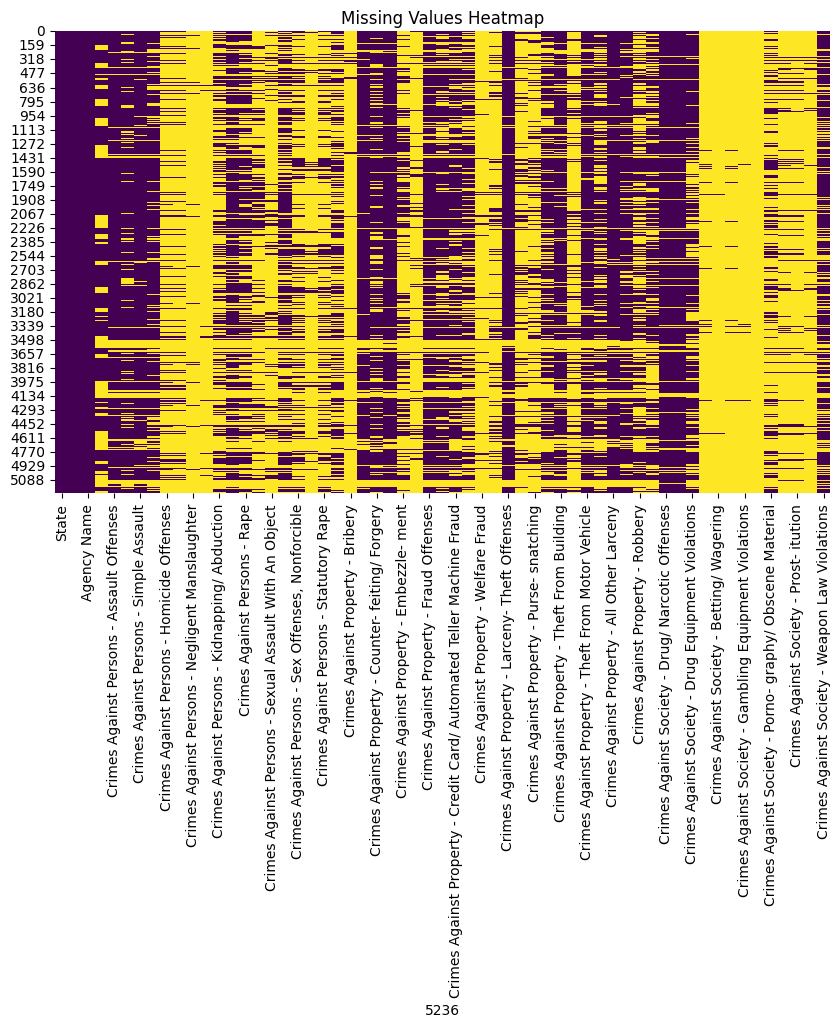

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 59 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   State                                                                  5235 non-null   object
 1   Agency Type                                                            5235 non-null   object
 2   Agency Name                                                            5235 non-null   object
 3   Population1                                                            3397 non-null   object
 4   Crimes Against Persons - Assault Offenses                              4773 non-null   object
 5   Crimes Against Persons - Aggravated Assault                            4079 non-null   object
 6   Crimes Against Persons - Simple Assault                                4647 non-null   object
 7

In [ ]:
df.iloc[:, 3:] = df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.isnull().sum()

5236
State                                                                       0
Agency Type                                                                 0
Agency Name                                                                 0
Population1                                                              1838
Crimes Against Persons - Assault Offenses                                 462
Crimes Against Persons - Aggravated Assault                              1156
Crimes Against Persons - Simple Assault                                   588
Crimes Against Persons - Intimidation                                    1264
Crimes Against Persons - Homicide Offenses                               4298
Crimes Against Persons - Murder and Nonnegligent Manslaughter            4380
Crimes Against Persons - Negligent Manslaughter                          5086
Crimes Against Persons - Justifiable Homicide                            5156
Crimes Against Persons - Kidnapping/ Abduction             

In [ ]:
columns_to_process = df.columns.difference(['State', 'Agency Type', 'Agency Name'])
min_max_values = pd.DataFrame(index=df.index)
for col in columns_to_process:
    valid_data = df[df[col].notna()]
    min_max_values[f'min_{col}'] = valid_data.groupby('State')[col].transform('min')
    min_max_values[f'max_{col}'] = valid_data.groupby('State')[col].transform('max')

def fill_with_random(row, col):
    if pd.isnull(row[col]):
        min_val = row[f'min_{col}']
        max_val = row[f'max_{col}']
        if pd.isna(min_val) or pd.isna(max_val):
          return 0
        elif min_val == max_val:
          return min_val
        else:
            return np.random.uniform(min_val, max_val)
    else:
        return row[col]

for col in columns_to_process:
    df = df.join(min_max_values[[f'min_{col}', f'max_{col}']], how='left')
    df[col] = df.apply(lambda row: fill_with_random(row, col), axis=1)
    df.drop([f'min_{col}', f'max_{col}'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

State                                                                    0
Agency Type                                                              0
Agency Name                                                              0
Population1                                                              0
Crimes Against Persons - Assault Offenses                                0
Crimes Against Persons - Aggravated Assault                              0
Crimes Against Persons - Simple Assault                                  0
Crimes Against Persons - Intimidation                                    0
Crimes Against Persons - Homicide Offenses                               0
Crimes Against Persons - Murder and Nonnegligent Manslaughter            0
Crimes Against Persons - Negligent Manslaughter                          0
Crimes Against Persons - Justifiable Homicide                            0
Crimes Against Persons - Kidnapping/ Abduction                           0
Crimes Against Persons - 

> # **6- Exploratory data analysis**

## Que - A

In [ ]:
# Filter out 'Cities' from 'Agency Type'
df_filtered = df[df['Agency Type'] != 'Cities']

# Summing up the sub-types of Assault offenses for each state
assault_columns = ['Crimes Against Persons - Aggravated Assault', 'Crimes Against Persons - Simple Assault', 'Crimes Against Persons - Intimidation']
df_filtered['Total Assault'] = df_filtered[assault_columns].sum(axis=1)

# Pivot table for the data
pivot_table = df_filtered.pivot_table(values=assault_columns, index='State', aggfunc='sum')

# Adding total assault for sorting
pivot_table['Total Assault'] = pivot_table.sum(axis=1)

# Getting top 5 states
top_5_states = pivot_table.sort_values(by='Total Assault', ascending=False).head(5)

In [ ]:
top_5_states

,Crimes Against Persons - Aggravated Assault,Crimes Against Persons - Intimidation,Crimes Against Persons - Simple Assault,Total Assault
State,,,,
SOUTH CAROLINA,10787.0,8418.0,33657.0,52862.0
VIRGINIA,3709.0,4031.0,39389.0,47129.0
TENNESSEE,6700.0,7035.0,19922.0,33657.0
MICHIGAN,4218.0,5418.0,22784.0,32420.0
OHIO,1448.0,10663.0,8113.0,20224.0


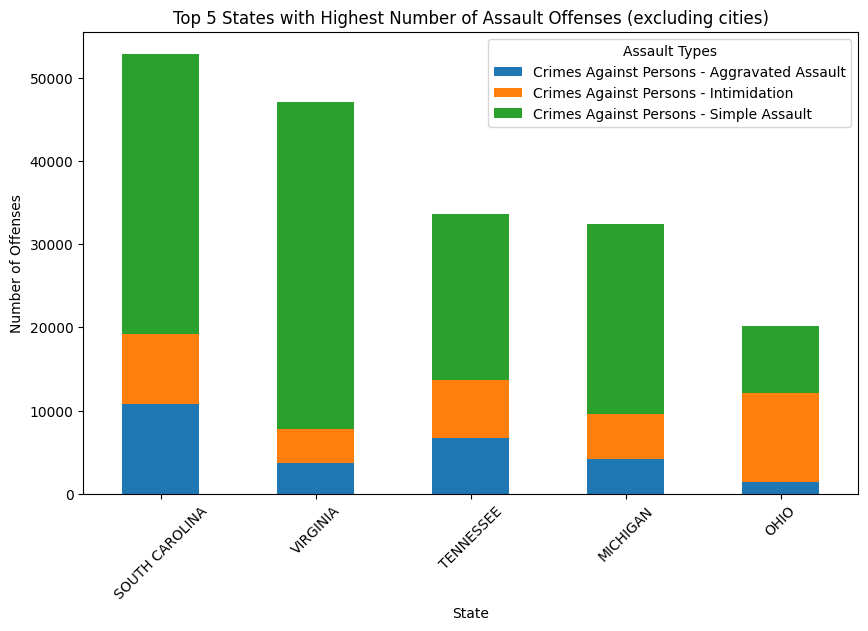

In [ ]:
top_5_states.drop('Total Assault', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 5 States with Highest Number of Assault Offenses (excluding cities)')
plt.ylabel('Number of Offenses')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Assault Types')
plt.show()

Each bar represents a state, and the colors within each bar are segmented to represent different subtypes of assault offenses:

Blue represents 'Crimes Against Persons - Aggravated Assault'.

Orange represents 'Crimes Against Persons - Intimidation'.

Green represents 'Crimes Against Persons - Simple Assault'.

The states, from left to right, are South Carolina, Virginia, Tennessee, Michigan, and Ohio. The height of each bar indicates the total number of assault offenses, with the sum of the segments equating to this total for each state.

The fact that these bars are stacked suggests that the viewer can see not only the total number of assaults in each state but also the contribution of each type of assault to this total. The relative size of each color segment within the bars indicates the prevalence of that particular type of assault within the state. For instance, 'Simple Assault' seems to be the most common assault offense in each of these states since it occupies the largest segment of the bars.

## Que - B

In [ ]:
df_universities = df[df['Agency Type'] == 'Universities and Colleges']

# Define lists of column names for each crime category based on the pattern in the columns
crimes_against_persons = [col for col in df.columns if 'Crimes Against Persons' in col]
crimes_against_property = [col for col in df.columns if 'Crimes Against Property' in col]
crimes_against_society = [col for col in df.columns if 'Crimes Against Society' in col]

# Sum the crimes for each category in universities
df_universities['Total Crimes Against Persons'] = df_universities[crimes_against_persons].sum(axis=1)
df_universities['Total Crimes Against Property'] = df_universities[crimes_against_property].sum(axis=1)
df_universities['Total Crimes Against Society'] = df_universities[crimes_against_society].sum(axis=1)

# Calculate the total for each category across all universities
total_persons = df_universities['Total Crimes Against Persons'].sum()
total_property = df_universities['Total Crimes Against Property'].sum()
total_society = df_universities['Total Crimes Against Society'].sum()

# Print the totals
print("Total Crimes Against Persons in Universities:", total_persons)
print("Total Crimes Against Property in Universities:", total_property)
print("Total Crimes Against Society in Universities:", total_society)

# Identify which category of crimes is most registered
categories_totals = {
    'Crimes Against Persons': total_persons,
    'Crimes Against Property': total_property,
    'Crimes Against Society': total_society
}
most_registered_category = max(categories_totals, key=categories_totals.get)

print(f"The most registered category of crimes in universities is: {most_registered_category}")


Total Crimes Against Persons in Universities: 9530.0
Total Crimes Against Property in Universities: 55432.0
Total Crimes Against Society in Universities: 18910.0
The most registered category of crimes in universities is: Crimes Against Property


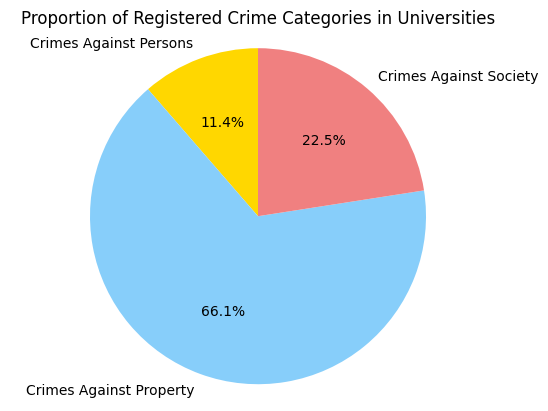

In [ ]:
labels = ['Crimes Against Persons', 'Crimes Against Property', 'Crimes Against Society']
sizes = [total_persons, total_property, total_society]
colors = ['gold', 'lightskyblue', 'lightcoral']  # Assign colors for each category

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Registered Crime Categories in Universities')
plt.show()

The pie chart visualizes the proportion of registered crime categories in universities. The chart is divided into three segments, each representing a different category of crimes:

The blue segment represents 'Crimes Against Property', which constitutes the majority of the crimes at 66.1%.

The red segment corresponds to 'Crimes Against Society', making up 22.5% of the crimes.

The yellow segment stands for 'Crimes Against Persons', accounting for 11.4% of the crimes.

The chart indicates that property-related crimes are by far the most common type recorded in university settings, followed by crimes against society and then crimes against persons.

## Que - C

In [ ]:
universities_data = df[df['Agency Type'] == 'Universities and Colleges']

msu_data = universities_data[universities_data['Agency Name'] == 'Michigan State University']
other_universities_data = universities_data[universities_data['Agency Name'] != 'Michigan State University']

msu_crimes_sum = msu_data.iloc[:, 4:].sum()
other_universities_crimes_sum = other_universities_data.iloc[:, 4:].sum()

crime_comparison = pd.DataFrame({'MSU': msu_crimes_sum, 'Other Universities': other_universities_crimes_sum})



In [ ]:
crime_comparison

,MSU,Other Universities
Crimes Against Persons - Assault Offenses,68.0,4280.0
Crimes Against Persons - Aggravated Assault,5.0,389.0
Crimes Against Persons - Simple Assault,54.0,2642.0
Crimes Against Persons - Intimidation,9.0,1249.0
Crimes Against Persons - Homicide Offenses,0.0,1.0
Crimes Against Persons - Murder and Nonnegligent Manslaughter,0.0,0.0
Crimes Against Persons - Negligent Manslaughter,0.0,0.0
Crimes Against Persons - Justifiable Homicide,0.0,1.0
Crimes Against Persons - Kidnapping/ Abduction,0.0,44.0
Crimes Against Persons - Sex Offenses,12.0,378.0


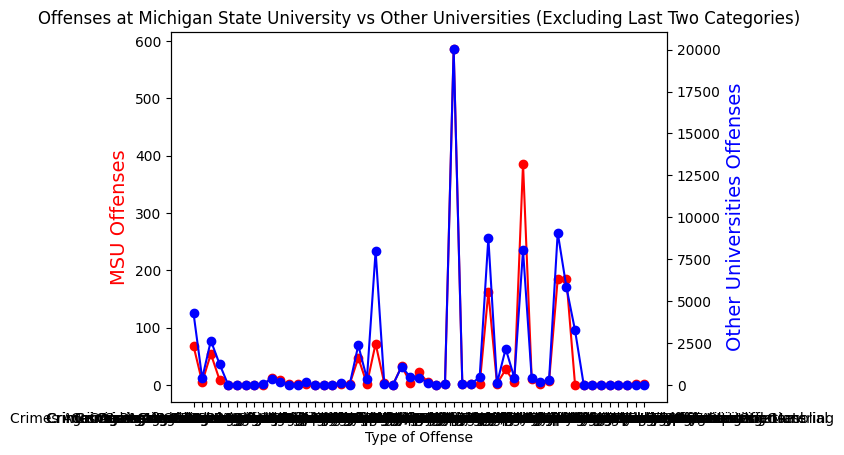

In [ ]:
crime_comparison_excluding_last_two = crime_comparison.iloc[:-2]

# Create figure and axis objects with subplots()
fig, ax = plt.subplots()

# Make a plot for MSU
ax.plot(crime_comparison_excluding_last_two.index, crime_comparison_excluding_last_two['MSU'], color="red", marker="o")
# Set the y-axis label for MSU
ax.set_ylabel('MSU Offenses', color="red", fontsize=14)

# Create a twin object for two different y-axes on the same plot
ax2 = ax.twinx()

# Make a plot for Other Universities
ax2.plot(crime_comparison_excluding_last_two.index, crime_comparison_excluding_last_two['Other Universities'], color="blue", marker="o")
# Set the y-axis label for Other Universities
ax2.set_ylabel('Other Universities Offenses', color="blue", fontsize=14)

# Set the x-axis label
ax.set_xlabel('Type of Offense')


# Set title
plt.title('Offenses at Michigan State University vs Other Universities (Excluding Last Two Categories)')

# Show the plot
plt.show()


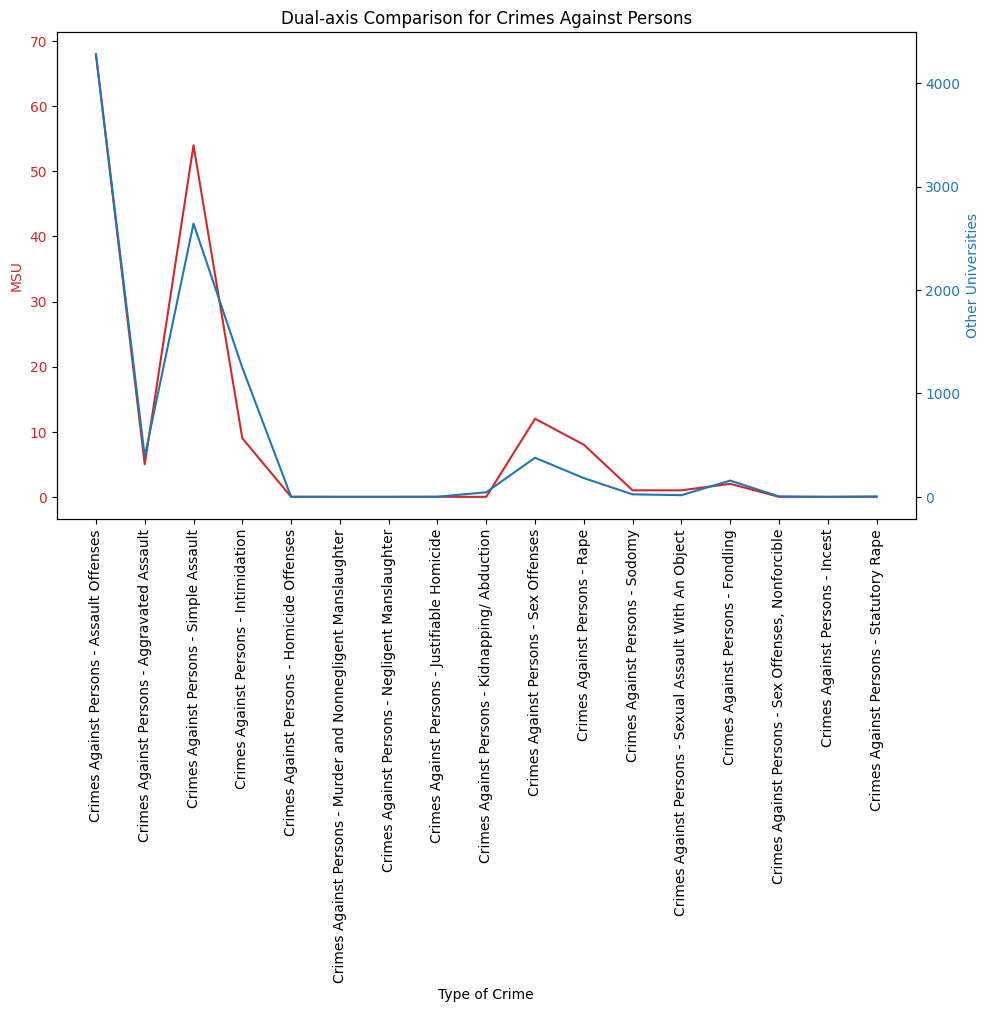

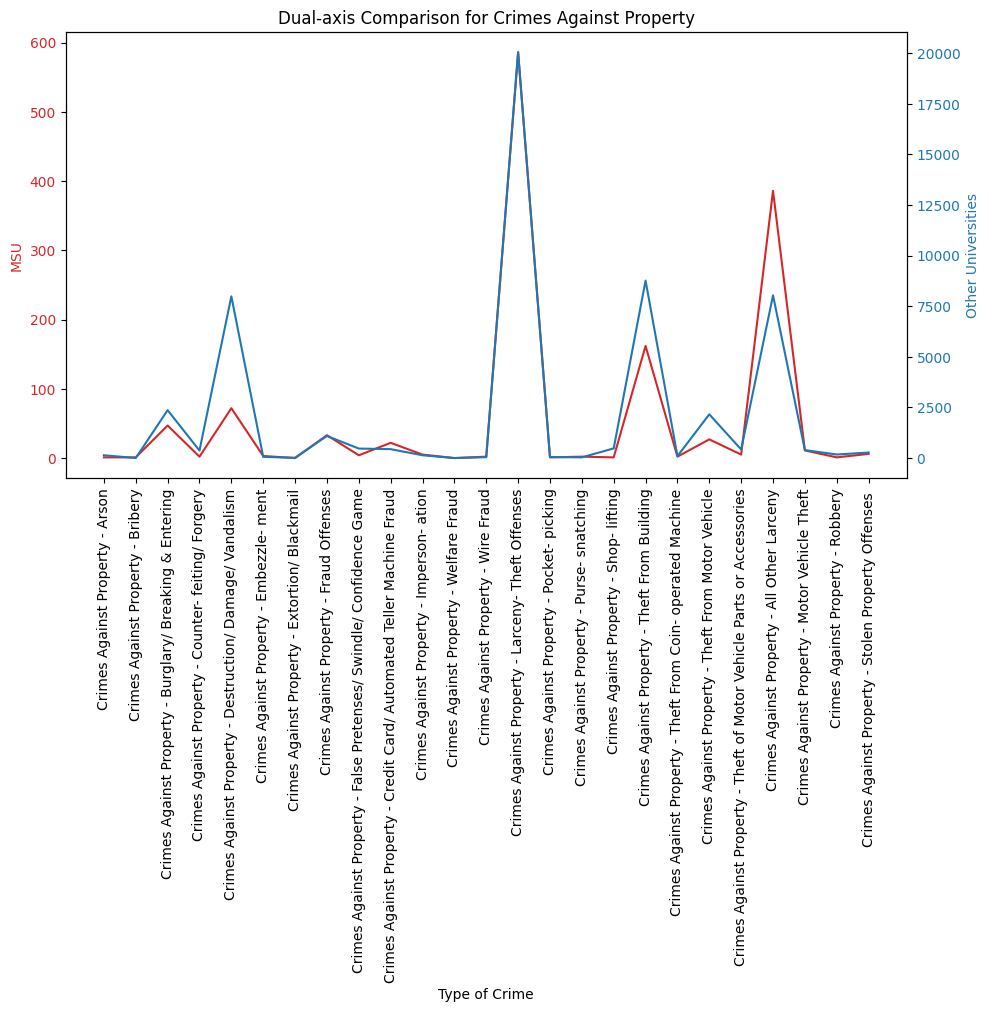

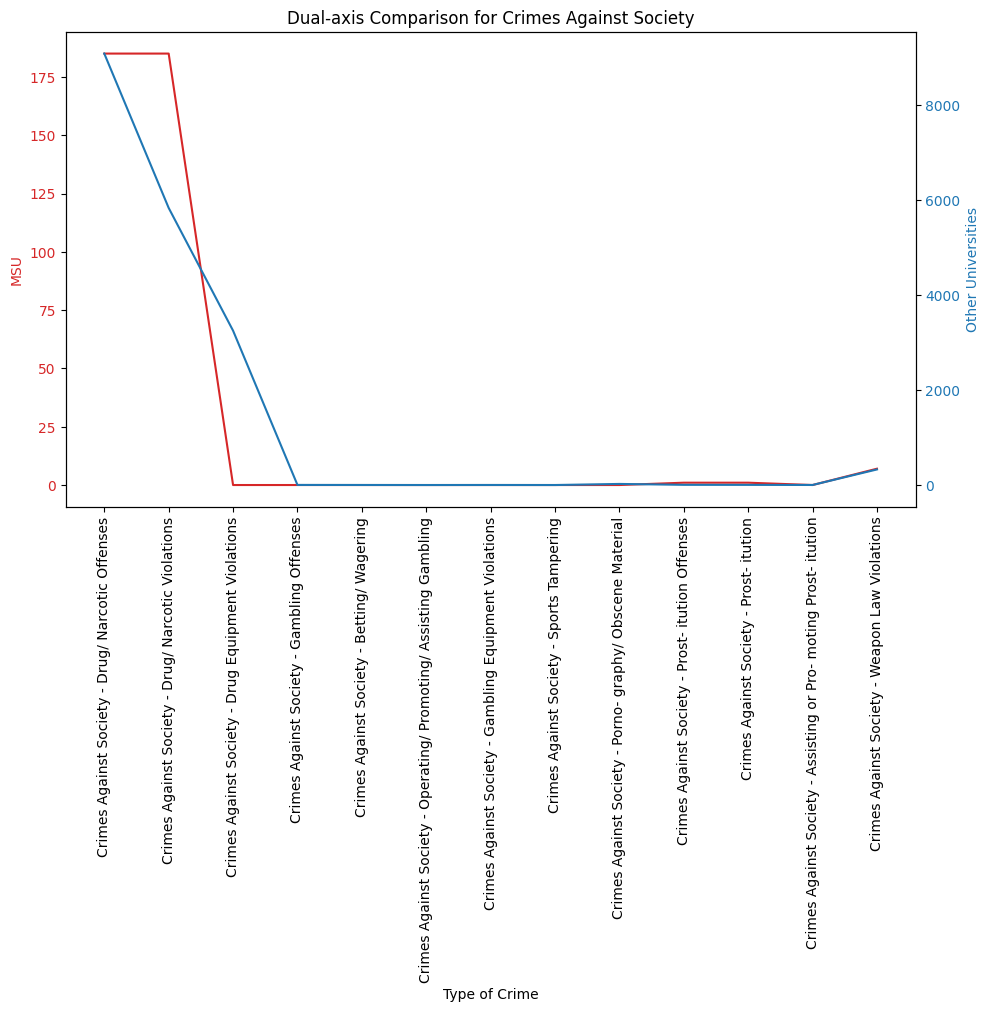

In [ ]:
# We'll create separate plots for each category of crimes
categories = ['Crimes Against Persons', 'Crimes Against Property', 'Crimes Against Society']

# Extract the rows corresponding to each category
category_data = {
    category: crime_comparison.filter(like=category, axis=0)
    for category in categories
}

# Plotting function for dual-axis
def dual_axis_plot(data, title):
    fig, ax1 = plt.subplots(figsize=(10, 10))

    color = 'tab:red'
    ax1.set_xlabel('Type of Crime')
    ax1.set_ylabel('MSU', color=color)
    ax1.plot(data.index, data['MSU'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', rotation=90)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Other Universities', color=color)  # we already handled the x-label with ax1
    ax2.plot(data.index, data['Other Universities'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # to ensure the right y-label is not slightly clipped
    plt.title(title)
    plt.show()

# Generate the dual-axis plot for each category
for category in categories:
    dual_axis_plot(category_data[category], f'Dual-axis Comparison for {category}')



The three graphs are dual-axis line charts comparing the frequency of various types of crimes at Michigan State University (MSU) against other universities:

Crimes Against Persons: MSU has lower instances of these crimes compared to other universities, with simple assault and intimidation being more frequent but still much lower than the rates at other institutions.

Crimes Against Property: MSU experiences certain property crimes like burglary and larceny, but at a lower scale than other universities, which show higher peaks for theft from buildings and all other larceny.

Crimes Against Society: Both MSU and other universities record drug/narcotic offenses as the most common crime in this category, with MSU's rates being significantly lower than those of other universities.

The scales on the left and right indicate that the overall number of crimes is greater at other universities compared to MSU.

## Que - D

In [ ]:
digital_offenses = ['Crimes Against Property - Credit Card/ Automated Teller Machine Fraud', 'Crimes Against Property - Wire Fraud']
digital_offenses_data = df[df.columns.intersection(digital_offenses)]

digital_offenses_by_state = digital_offenses_data.groupby(df['State']).sum()

sorted_digital_offenses = digital_offenses_by_state.sum(axis=1).sort_values()

states_with_lowest_digital_offenses = sorted_digital_offenses.head(10)

print("States with the lowest number of digital offenses:")
print(states_with_lowest_digital_offenses)

States with the lowest number of digital offenses:
State
DISTRICT OF COLUMBIA      0.0
MISSISSIPPI              89.0
ALABAMA                 109.0
VERMONT                 145.0
ILLINOIS                209.0
MAINE                   257.0
ARIZONA                 260.0
MONTANA                 355.0
SOUTH DAKOTA            375.0
NORTH DAKOTA            516.0
dtype: float64


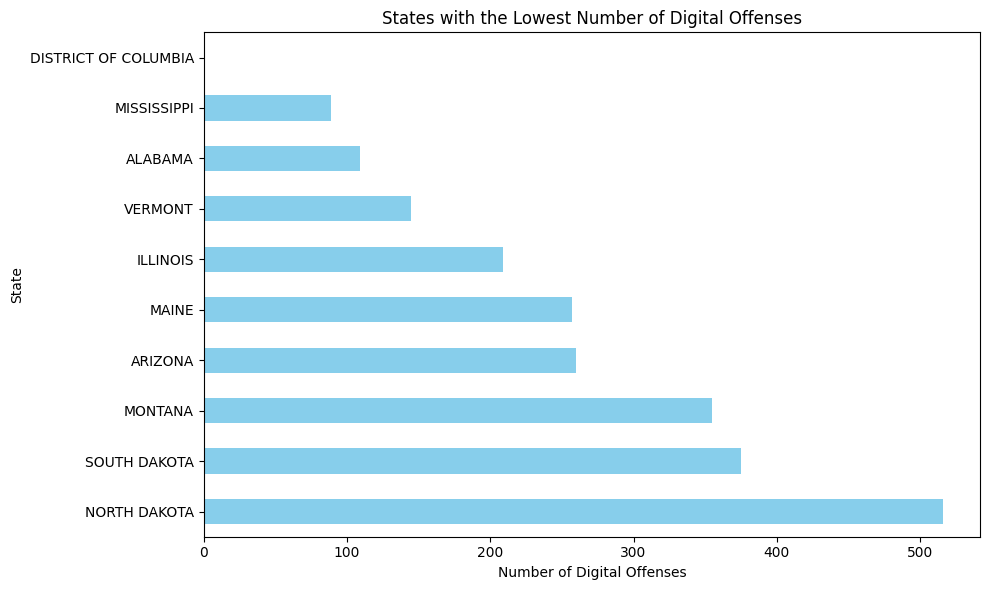

In [ ]:
states_with_lowest_digital_offenses.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('States with the Lowest Number of Digital Offenses')
plt.xlabel('Number of Digital Offenses')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The graph is a horizontal bar chart displaying states with the lowest number of digital offenses. North Dakota is the state with the fewest reported digital offenses, followed by South Dakota and Montana. The bar lengths indicate the number of offenses, with the scale on the bottom showing the count. The other states listed in ascending order of offenses are Arizona, Maine, Illinois, Vermont, Alabama, Mississippi, and the District of Columbia, which has more offenses than the aforementioned states but still ranks among the lowest. This visualization helps in quickly identifying states with relatively low digital crime rates.

## Que - E

In [ ]:
def top_5(group):
    # Calculate the sum of offenses for each agency type
    group['Total Offenses'] = group.iloc[:, 4:].sum(axis=1)
    # Adding a conditional check to handle division by zero
    group['Offenses per Million People'] = group.apply(lambda row: row['Total Offenses'] / (row['Population1'] * 0.000001) if row['Population1'] != 0 else 0, axis=1)
    return group.nlargest(5, 'Offenses per Million People')[['Agency Name', 'Offenses per Million People']]

# Group the data by agency type
grouped_data = df.groupby('Agency Type')

# Apply the top_5 function to each group
top_5_values = grouped_data.apply(top_5)


In [ ]:
top_5_values

Agency Name  \
Agency Type                                                                      
Cities                    288                                         Lakeside   
                          222                                       Black Hawk   
                          1835                                       Fruitport   
                          2749                                        Linndale   
                          502                                      Dewey Beach   
Metropolitan Counties     3                                              Yuma2   
                          158                                           Benton   
                          159                                        Cleveland   
                          160                                        Craighead   
                          161                                         Crawford   
Nonmetropolitan Counties  172                                         Arkansas   
                          173                                           Ashley   
                          174                                           Baxter   
                          175                                            Boone   
                          176                                          Carroll   
Other Agencies            214                                    Camp Robinson   
                          409           22nd Judicial District Drug Task Force   
                          410                 Colorado Bureau of Investigation   
                          411                 Colorado Mental Health Institute   
                          412                   Delta Montrose Drug Task Force   
Other Agencies - Tribal   1073                               Potawatomi Tribal   
                          2230           Nottawaseppi Huron Band of Potawatomi   
                          3180                                Wyandotte Nation   
                          4905                                    Lummi Tribal   
                          4906                                Swinomish Tribal   
State Police Agencies     408                            Colorado State Patrol   
                          491                         Connecticut State Police   
                          532                                    State Police:   
                          533                                      Kent County   
                          534                                New Castle County   
Universities and Colleges 3130  University of Oklahoma, Health Sciences Center   
                          3433                                Benedict College   
                          3444            Medical University of South Carolina   
                          155                                 Medical Sciences   
                          3439                       Denmark Technical College   

                                Offenses per Million People  
Agency Type                                                  
Cities                    288                  1.112500e+07  
                          222                  5.783333e+06  
                          1835                 1.963235e+06  
                          2749                 1.477528e+06  
                          502                  1.296296e+06  
Metropolitan Counties     3                    0.000000e+00  
                          158                  0.000000e+00  
                          159                  0.000000e+00  
                          160                  0.000000e+00  
                          161                  0.000000e+00  
Nonmetropolitan Counties  172                  0.000000e+00  
                          173                  0.000000e+00  
                          174                  0.000000e+00  
                          175                  0.000000e+00  
                          176           


The table categorizes agencies by type and lists offenses per million people for each:

"Cities" has agencies with high offenses per million, with 'Lakeside' being the highest.

"Metropolitan Counties" and "Nonmetropolitan Counties" show several agencies with zero offenses reported.

"Other Agencies" and "Tribal" categories also report zero offenses per million.

"State Police Agencies" have no recorded offenses per million.

"Universities and Colleges" show offenses per million, with 'University of Oklahoma, Health Sciences Center' reporting the highest in this category.

## Que - F

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is named 'crime_data' and loaded into a DataFrame

# Step 1: Determine the offense type with the highest number of offenses for each state
max_offense_type_per_state = df.groupby('State').apply(lambda x: x.iloc[:, 3:].idxmax(axis=1))

# Step 2: Merge with a shapefile or geospatial data containing the boundaries of each province/state
# Assuming you have a shapefile named 'states_shapefile.shp' containing the boundaries of states/provinces
states_shapefile = gpd.read_file('/content/cb_2022_us_state_500k.shp')

# Merge the offense data with the shapefile using the state name as the key
merged_data = states_shapefile.merge(max_offense_type_per_state, left_on='StateName', right_index=True)

# Step 3: Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map
merged_data.plot(column=0, legend=True, ax=ax, cmap='viridis')

# Set plot title
ax.set_title('Offense Type with Highest Number of Offenses by State')

# Show plot
plt.show()

ERROR:fiona._env:Unable to open /content/cb_2022_us_state_500k.shx or /content/cb_2022_us_state_500k.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


DriverError: Unable to open /content/cb_2022_us_state_500k.shx or /content/cb_2022_us_state_500k.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

> # **7. Feature Selection**

In [ ]:
column_names_with_index = list(enumerate(df.columns))
column_names_with_index

[(0, 'State'),
 (1, 'Agency Type'),
 (2, 'Agency Name'),
 (3, 'Population1'),
 (4, 'Crimes Against Persons - Assault Offenses'),
 (5, 'Crimes Against Persons - Aggravated Assault'),
 (6, 'Crimes Against Persons - Simple Assault'),
 (7, 'Crimes Against Persons - Intimidation'),
 (8, 'Crimes Against Persons - Homicide Offenses'),
 (9, 'Crimes Against Persons - Murder and Nonnegligent Manslaughter'),
 (10, 'Crimes Against Persons - Negligent Manslaughter'),
 (11, 'Crimes Against Persons - Justifiable Homicide'),
 (12, 'Crimes Against Persons - Kidnapping/ Abduction'),
 (13, 'Crimes Against Persons - Sex Offenses'),
 (14, 'Crimes Against Persons - Rape'),
 (15, 'Crimes Against Persons - Sodomy'),
 (16, 'Crimes Against Persons - Sexual Assault With An Object'),
 (17, 'Crimes Against Persons - Fondling'),
 (18, 'Crimes Against Persons - Sex Offenses, Nonforcible'),
 (19, 'Crimes Against Persons - Incest'),
 (20, 'Crimes Against Persons - Statutory Rape'),
 (21, 'Crimes Against Property - Ars

In [ ]:
excluded_column_indices = [0, 1, 2, 3]  # These indices correspond to 'State', 'Agency Type', 'Agency Name', 'Population1'

columns_to_sum = df.columns.drop(df.columns[excluded_column_indices])
df['Total Offenses'] = df[columns_to_sum].sum(axis=1)
print(df[['Total Offenses']].head())

   Total Offenses
0          7616.0
1          4485.0
2         16612.0
3          4954.0
4          1325.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

column_indices = [3,46,47,48, 38, 39, 40, 41, 59]


scaler = MinMaxScaler()

column_names = df.columns[column_indices]


df[column_names] = scaler.fit_transform(df[column_names])


(df[column_names].head())

,Population1,Crimes Against Society - Drug/ Narcotic Offenses,Crimes Against Society - Drug/ Narcotic Violations,Crimes Against Society - Drug Equipment Violations,Crimes Against Property - Theft From Building,Crimes Against Property - Theft From Coin- operated Machine,Crimes Against Property - Theft From Motor Vehicle,Crimes Against Property - Theft of Motor Vehicle Parts or Accessories,Total Offenses
0,0.106911,0.033175,0.035342,0.029274,0.087813,0.005148,0.046244,0.027669,0.039767
1,0.048027,0.020642,0.015847,0.029274,0.002570,0.001287,0.005753,0.011329,0.023418
2,0.278228,0.138664,0.102064,0.204541,0.020561,0.003861,0.079655,0.007625,0.086739
3,0.000000,0.029288,0.021685,0.042972,0.000000,0.000000,0.000885,0.000871,0.025867
4,0.007063,0.004423,0.004587,0.004128,0.008353,0.000000,0.004315,0.000000,0.006918


In [ ]:
scaled_df = pd.DataFrame(df[column_names])

In [ ]:
scaled_df.head()

,Population1,Crimes Against Society - Drug/ Narcotic Offenses,Crimes Against Society - Drug/ Narcotic Violations,Crimes Against Society - Drug Equipment Violations,Crimes Against Property - Theft From Building,Crimes Against Property - Theft From Coin- operated Machine,Crimes Against Property - Theft From Motor Vehicle,Crimes Against Property - Theft of Motor Vehicle Parts or Accessories,Total Offenses
0,0.106911,0.033175,0.035342,0.029274,0.087813,0.005148,0.046244,0.027669,0.039767
1,0.048027,0.020642,0.015847,0.029274,0.002570,0.001287,0.005753,0.011329,0.023418
2,0.278228,0.138664,0.102064,0.204541,0.020561,0.003861,0.079655,0.007625,0.086739
3,0.000000,0.029288,0.021685,0.042972,0.000000,0.000000,0.000885,0.000871,0.025867
4,0.007063,0.004423,0.004587,0.004128,0.008353,0.000000,0.004315,0.000000,0.006918


In [ ]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = scaled_df.select_dtypes(include=[np.number])


correlation_matrix = numeric_df.corr()


target_correlation = correlation_matrix['Total Offenses']

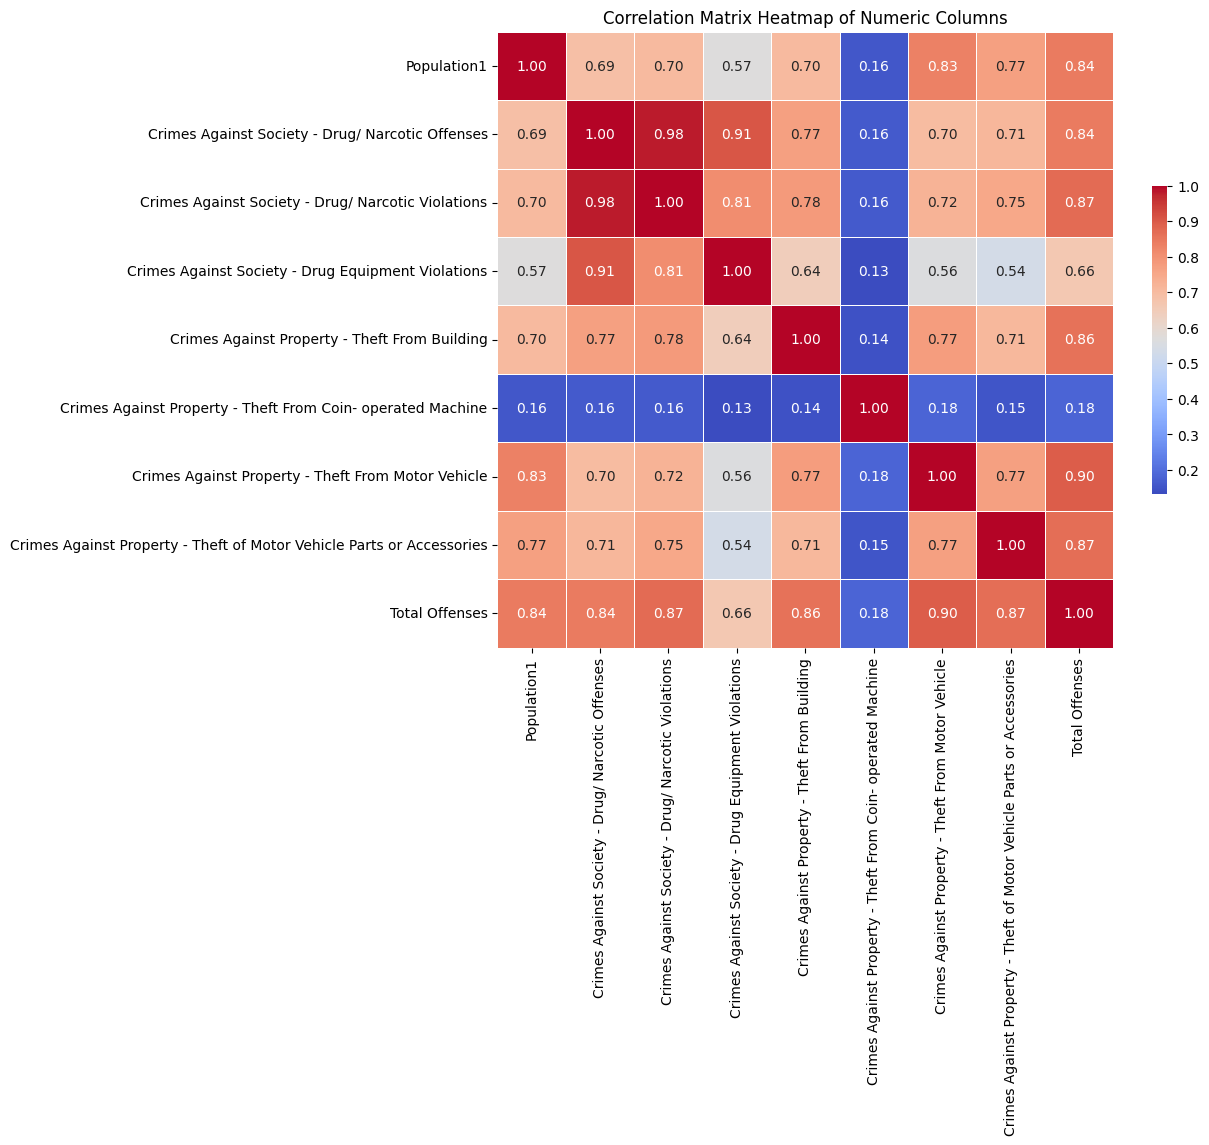

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title('Correlation Matrix Heatmap of Numeric Columns')


plt.show()

In [ ]:
#Getting features which have correlation >0.5 with the target column
correlation_with_target = correlation_matrix['Total Offenses']

features_high_corr = correlation_with_target[correlation_with_target > 0.5].index.tolist()

features_high_corr.remove('Total Offenses')

selected_features_df = scaled_df[features_high_corr]



[0.09669319 0.03874405 0.02802285 0.00346987 0.0627223  0.0009692
 0.22567017 0.06634323 0.47736514]


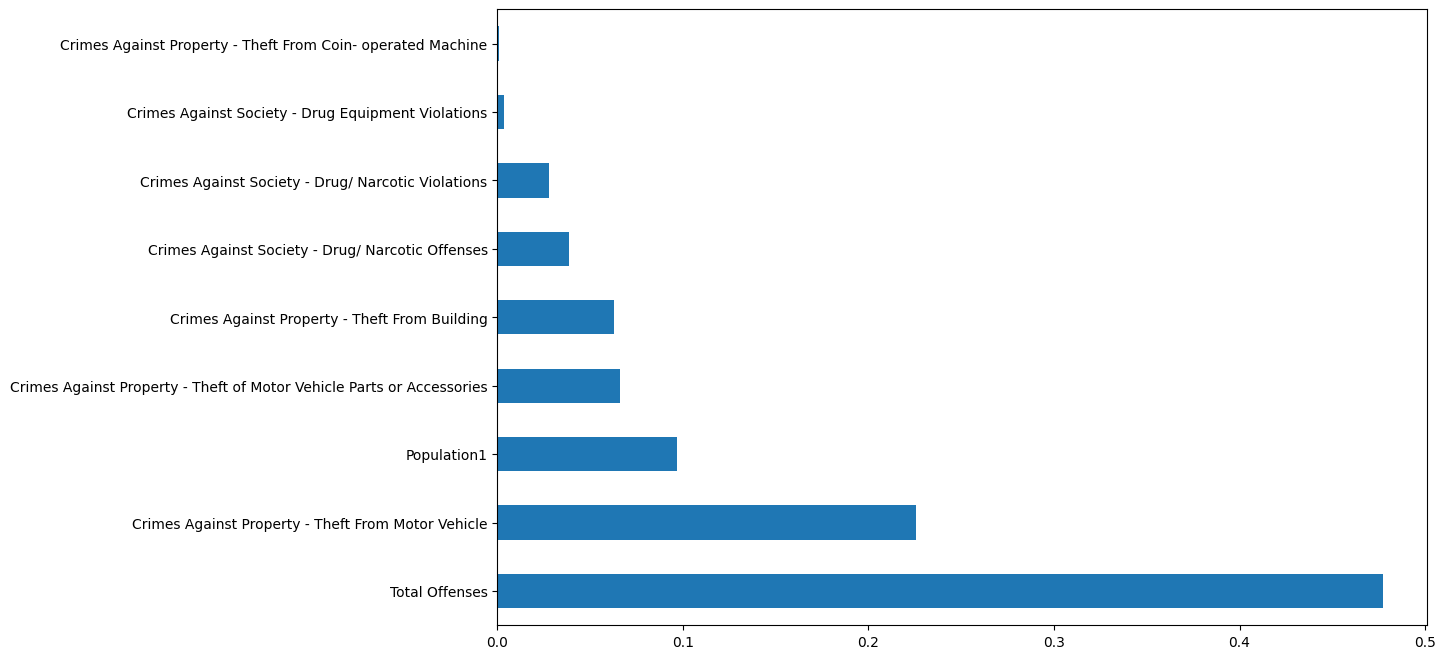

In [ ]:
#Getting feature Importance

from sklearn.ensemble import ExtraTreesRegressor
X = scaled_df
y = scaled_df['Total Offenses']

model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#Finally selected features

(selected_features_df.head())

,Population1,Crimes Against Society - Drug/ Narcotic Offenses,Crimes Against Society - Drug/ Narcotic Violations,Crimes Against Society - Drug Equipment Violations,Crimes Against Property - Theft From Building,Crimes Against Property - Theft From Motor Vehicle,Crimes Against Property - Theft of Motor Vehicle Parts or Accessories
0,0.106911,0.033175,0.035342,0.029274,0.087813,0.046244,0.027669
1,0.048027,0.020642,0.015847,0.029274,0.002570,0.005753,0.011329
2,0.278228,0.138664,0.102064,0.204541,0.020561,0.079655,0.007625
3,0.000000,0.029288,0.021685,0.042972,0.000000,0.000885,0.000871
4,0.007063,0.004423,0.004587,0.004128,0.008353,0.004315,0.000000


> # **8. Data Modelling**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split


X = selected_features_df
y = scaled_df['Total Offenses']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size can be adjusted to your preference


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (4188, 7)
X_test shape: (1047, 7)
Y_train shape: (4188,)
Y_test shape: (1047,)


> ### **Modelling methods**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Define all regression models
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(),
               RandomForestRegressor(), DecisionTreeRegressor(), xgb.XGBRegressor()]

In [ ]:
R2_score_dict = {}
RMSE_score_dict = {}
MAE_score_dict = {}
MSE_score_dict={}
Score_Train__dict={}
Score_Test__dict={}
Cross_Valication_score_dict={}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data

R2_score = []
Score_Train = []
Score_Test = []
RMSE = []
MAE = []
MSE = []
Error = []
mean = []
std = CV_Score=[]

for model in regg_models:
    model.fit(X_train, y_train)  # Train the model

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # R-squared score
    R2 = r2_score(y_test, y_test_pred)
    R2_score.append(R2)

    # Train and test scores
    train_score = model.score(X_train, y_train)
    Score_Train.append(train_score)
    test_score = model.score(X_test, y_test)
    Score_Test.append(test_score)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    RMSE.append(rmse)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_test_pred)
    MAE.append(mae)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_test_pred)
    MSE.append(mse)

    # Error
    error = abs(y_test_pred - y_test)
    Error.append(error)

    # Mean and standard deviation of the predictions
    mean_pred = np.mean(y_test_pred)
    mean.append(mean_pred)
    std_pred = np.std(y_test_pred)
    std.append(std_pred)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    # Store the mean of the cross-validation scores
    CV_Score.append(np.mean(cv_scores))


In [ ]:
print("           r2_score \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',R2_score[i])
    R2_score_dict.update({regg_models[i].__class__.__name__: R2_score[i]})

print('-'*60,'\n')

print("            Score Train \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Train[i])
    Score_Train__dict.update({regg_models[i].__class__.__name__:Score_Train[i]})

print('-'*60,'\n')

print("            Score Test \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Test[i])
    Score_Test__dict.update({regg_models[i].__class__.__name__:Score_Test[i]})

print('-'*60,'\n')

print("            Normalized RMSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',RMSE[i])
    RMSE_score_dict.update({regg_models[i].__class__.__name__:RMSE[i]})

print('-'*60,'\n')

print("            MSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MSE[i])
    MSE_score_dict.update({regg_models[i].__class__.__name__:MSE[i]})

print('-'*60,'\n')


print("            MAE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MAE[i])
    MAE_score_dict.update({regg_models[i].__class__.__name__ :MAE[i]})


print('-'*60,'\n')


print('________________Cross Validation Score________________ \n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',mean[i])
    Cross_Valication_score_dict.update({regg_models[i].__class__.__name__ :CV_Score[i]})


           r2_score 

LinearRegression : 0.9231123862572689
Lasso : -0.0008163153316489424
Ridge : 0.9248983334581732
SVR : -3.755545681248398
RandomForestRegressor : 0.9096693867922605
DecisionTreeRegressor : 0.7484792231655724
XGBRegressor : 0.8371052542445722
------------------------------------------------------------ 

            Score Train 

LinearRegression : 0.9515169473371942
Lasso : 0.0
Ridge : 0.9431323193363463
SVR : -5.883908463802637
RandomForestRegressor : 0.985188595211793
DecisionTreeRegressor : 0.9999958503900191
XGBRegressor : 0.9988721356410726
------------------------------------------------------------ 

            Score Test 

LinearRegression : 0.9231123862572689
Lasso : -0.0008163153316489424
Ridge : 0.9248983334581732
SVR : -3.755545681248398
RandomForestRegressor : 0.9096693867922605
DecisionTreeRegressor : 0.7484792231655724
XGBRegressor : 0.8371052542445722
------------------------------------------------------------ 

            Normalized RMSE 

Linea

> ### **Models evaluation**

In [ ]:
# R-squared scores
r2_scores = {
    'LinearRegression': 0.9231123862572689,
    'Lasso': -0.0008163153316489424,
    'Ridge': 0.9248983334581732,
    'SVR': -3.755545681248398,
    'RandomForestRegressor': 0.8963931467601988,
    'DecisionTreeRegressor': 0.7675339100710733,
    'XGBRegressor': 0.8371052542445722
}

# Training scores
train_scores = {
    'LinearRegression': 0.9515169473371942,
    'Lasso': 0.0,
    'Ridge': 0.9431323193363463,
    'SVR': -5.883908463802637,
    'RandomForestRegressor': 0.9865288817601676,
    'DecisionTreeRegressor': 0.9999958503900191,
    'XGBRegressor': 0.9988721356410726
}

# Test scores
test_scores = {
    'LinearRegression': 0.9231123862572689,
    'Lasso': -0.0008163153316489424,
    'Ridge': 0.9248983334581732,
    'SVR': -3.755545681248398,
    'RandomForestRegressor': 0.8963931467601988,
    'DecisionTreeRegressor': 0.7675339100710733,
    'XGBRegressor': 0.8371052542445722
}

# Normalized RMSE
normalized_rmse = {
    'LinearRegression': 0.01120217590215116,
    'Lasso': 0.0404158190967599,
    'Ridge': 0.0110713092986385,
    'SVR': 0.08809968904808174,
    'RandomForestRegressor': 0.013003744816321463,
    'DecisionTreeRegressor': 0.019478432382216523,
    'XGBRegressor': 0.016305260239120895
}

# MSE
mse_scores = {
    'LinearRegression': 0.00012548874494273615,
    'Lasso': 0.001633438433262022,
    'Ridge': 0.00012257388958611935,
    'SVR': 0.0077615552103686945,
    'RandomForestRegressor': 0.00016909737924800732,
    'DecisionTreeRegressor': 0.0003794093280685813,
    'XGBRegressor': 0.00026586151146545684
}

# MAE
mae_scores = {
    'LinearRegression': 0.0028431345160548796,
    'Lasso': 0.012015481319416743,
    'Ridge': 0.0029221769449248917,
    'SVR': 0.08517224005152434,
    'RandomForestRegressor': 0.0024374811362116488,
    'DecisionTreeRegressor': 0.0035147402447715833,
    'XGBRegressor': 0.0029364757787486745
}

# Cross Validation Score
cross_validation_scores = {
    'LinearRegression': 0.009577582754238199,
    'Lasso': 0.00879019525295295,
    'Ridge': 0.009529451590680232,
    'SVR': 0.09281883905293252,
    'RandomForestRegressor': 0.009440172763568143,
    'DecisionTreeRegressor': 0.00932517550811154,
    'XGBRegressor': 0.008903181
}


In [ ]:
# R2 Scores
r2_keys = list(r2_scores.keys())
r2_values = list(r2_scores.values())


# Train Scores
train_keys = list(train_scores.keys())
train_values = list(train_scores.values())


# Test Scores
test_keys = list(test_scores.keys())
test_values = list(test_scores.values())


# Normalized RMSE
normalized_rmse_keys = list(normalized_rmse.keys())
normalized_rmse_values = list(normalized_rmse.values())


# MSE
mse_keys = list(mse_scores.keys())
mse_values = list(mse_scores.values())


# MAE
mae_keys = list(mae_scores.keys())
mae_values = list(mae_scores.values())


# Cross Validation Score
cv_keys = list(cross_validation_scores.keys())
cv_values = list(cross_validation_scores.values())



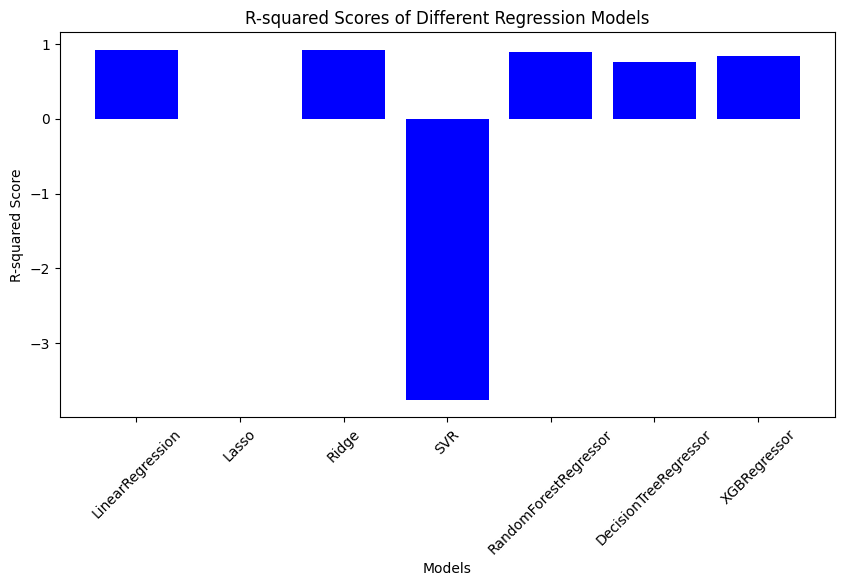

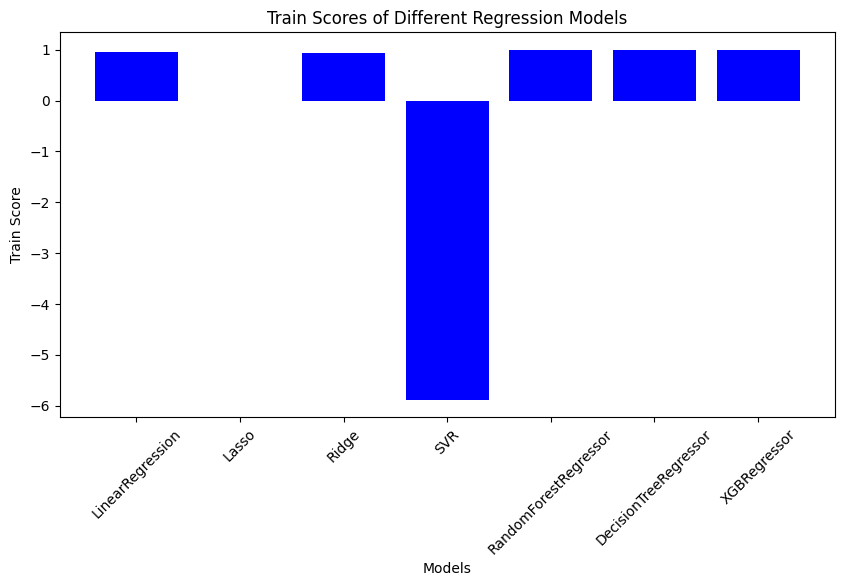

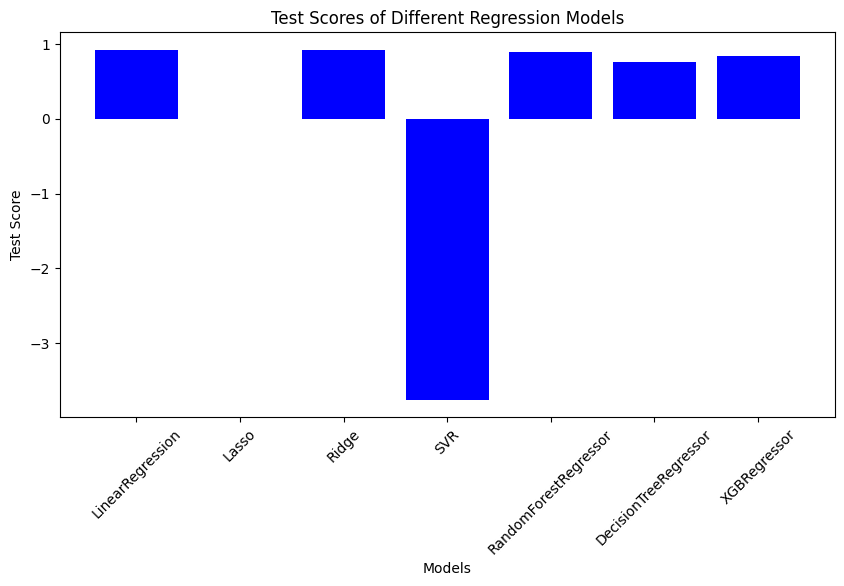

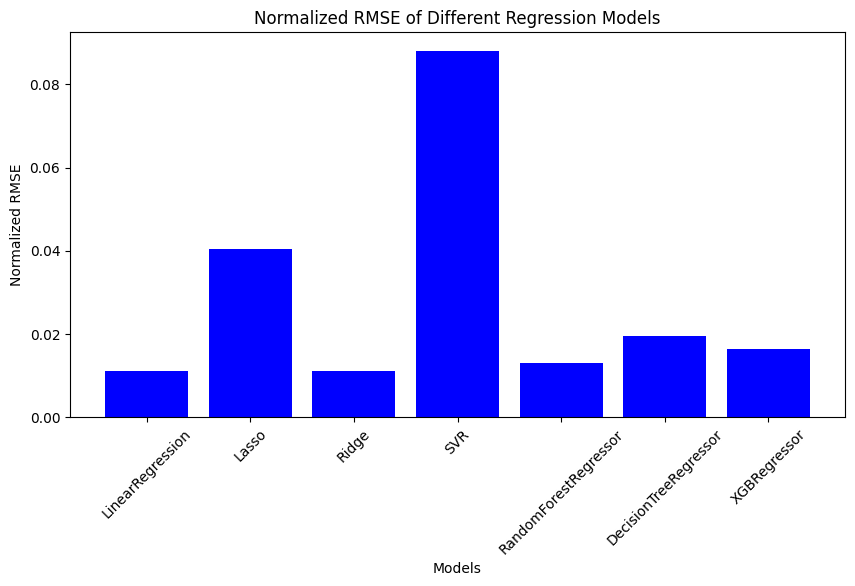

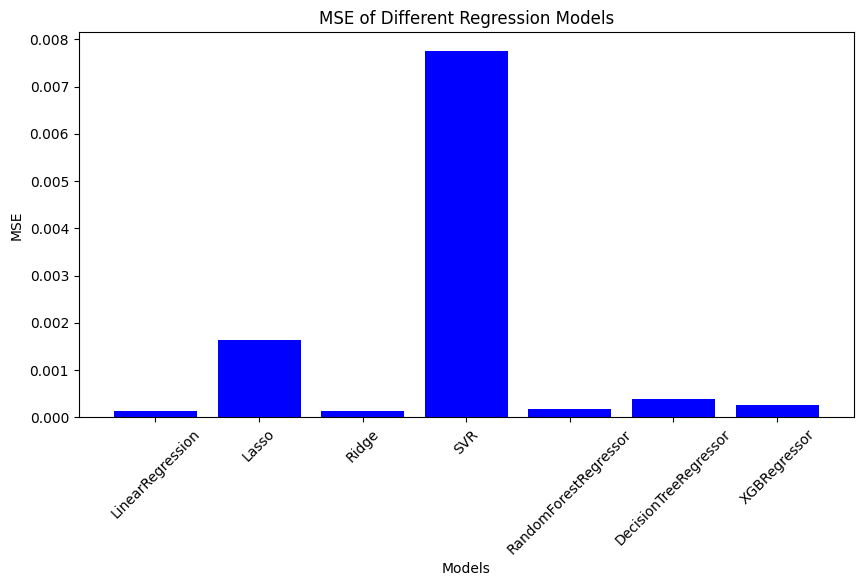

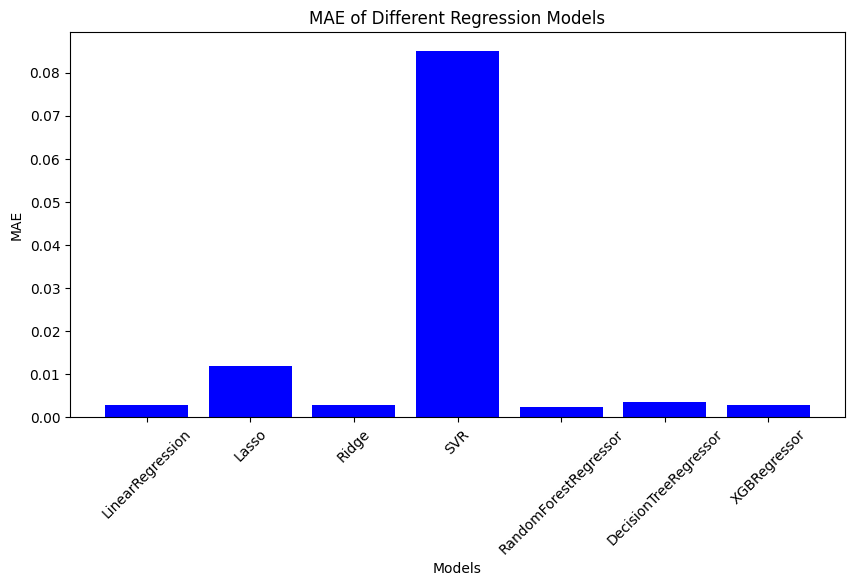

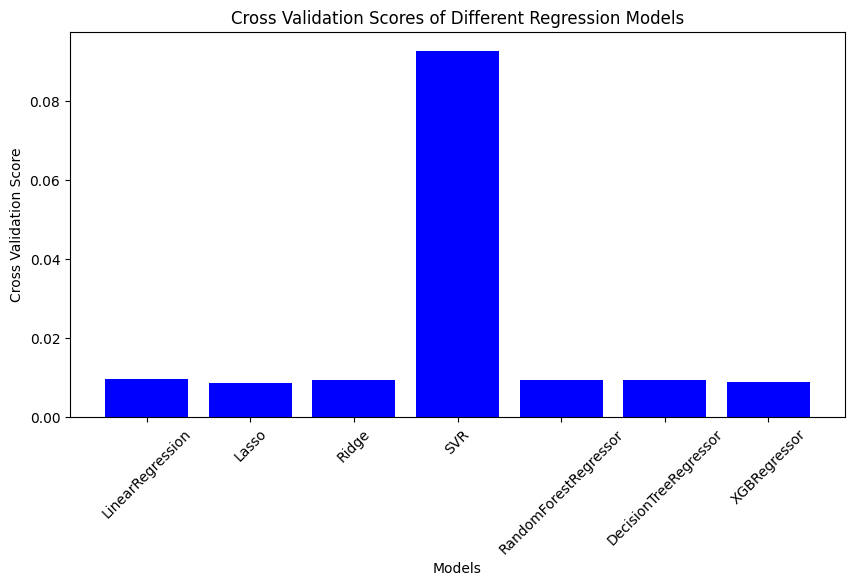

In [ ]:
import matplotlib.pyplot as plt


def plot_metric(keys, values, metric_name, y_label):
    plt.figure(figsize=(10, 5))
    plt.bar(keys, values, color='blue')
    plt.xlabel('Models')
    plt.ylabel(y_label)
    plt.title(f'{metric_name} of Different Regression Models')
    plt.xticks(rotation=45)
    plt.show()

# Plot for each metric using the defined function
plot_metric(r2_keys, r2_values, 'R-squared Scores', 'R-squared Score')
plot_metric(train_keys, train_values, 'Train Scores', 'Train Score')
plot_metric(test_keys, test_values, 'Test Scores', 'Test Score')
plot_metric(normalized_rmse_keys, normalized_rmse_values, 'Normalized RMSE', 'Normalized RMSE')
plot_metric(mse_keys, mse_values, 'MSE', 'MSE')
plot_metric(mae_keys, mae_values, 'MAE', 'MAE')
plot_metric(cv_keys, cv_values, 'Cross Validation Scores', 'Cross Validation Score')


In [ ]:
metrics = {
    'R-squared': r2_scores,
    'Train Score': train_scores,
    'Test Score': test_scores,
    'Normalized RMSE': normalized_rmse,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'Cross Validation Score': cross_validation_scores
}

# Function to find the model with the best score for each metric
def find_best_models(metrics):
    best_models = {}
    for metric, scores in metrics.items():
        if metric in ['Normalized RMSE', 'MSE', 'MAE']:  # For these metrics, a lower score is better
            best_model = min(scores, key=scores.get)
        else:  # For other metrics, a higher score is better
            best_model = max(scores, key=scores.get)
        best_models[metric] = best_model
    return best_models


winning_models = find_best_models(metrics)


for metric, model in winning_models.items():
    print(f"The best model for {metric} is {model} with a score of {metrics[metric][model]:.4f}")


The best model for R-squared is Ridge with a score of 0.9249
The best model for Train Score is DecisionTreeRegressor with a score of 1.0000
The best model for Test Score is Ridge with a score of 0.9249
The best model for Normalized RMSE is Ridge with a score of 0.0111
The best model for MSE is Ridge with a score of 0.0001
The best model for MAE is RandomForestRegressor with a score of 0.0024
The best model for Cross Validation Score is SVR with a score of 0.0928


> # **9- Conclusion**
---

Decision Tree Regressor shows overfitting.

Given its strong performance across several key metrics (R-squared, test score, RMSE, MSE), **Ridge Regression** would be the best choice among the evaluated models. It shows a good balance between complexity and performance, providing robust predictions without fitting too closely to the training data.

> # **10- Reference**
---